# U.S. Medical Insurance Costs

## Hypothesis Framing

The question we'd like to ask and understand: What affects insurance charges? The dataset we have categorizes each individual by Age, Sex, BMI, Number of Children, Smoker or Non-Smoker, and Region. 

We will begin with an exploratory analysis of our data, with the aim of understanding the demographics of our population. We hope to use the understanding gleaned here to create a predictive model later on.

The characteristics (variables) included in our dataset are:

1) Age = Integer, 18-64 inclusive
2) Sex = String, binary ('male', 'female')*
3) BMI = Float
4) Children = Integer, 0-5 inclusive
5) Smoker = String, binary ("no" for non-smoker, "yes" for smoker)
6) Region = String, 4 options (southwest, southeast, northwest, northeast)

Let's start by importing our dataset and the appropriate modules (namely NumPy, Pandas, MatPlotLib, Seaborn, and others) and getting a handle on our data.

*While gender includes a spectrum of identities, we are assuming for this dataset that the variable "Sex" refers to sex-assigned-at-birth.

## Demographics Exploratory Data Analysis (EDA)

In [340]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme(style="darkgrid")
colors = sns.color_palette("deep")
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Create Pandas DataFrame from our data
df = pd.read_csv('insurance.csv')

#Male vs female count
sns.catplot(data=df, kind='count', x='sex', hue='sex')
plt.title("Male vs Female Population in Data")
plt.xlabel("Sex")
plt.show()

#Smokers vs non-smokers
sns.catplot(data=df, kind='count', x='smoker', hue='smoker')
plt.title('Smoker vs Non-smoker')
plt.xlabel('Smoking Habit')
plt.show()

#Distribution of Age
sns.displot(data=df, x='age', kde=True, bins=20, stat='density')
plt.title('Age and Population Density (KDE + Histogram)')
plt.xlabel('Age (Years)')
plt.ylabel('Population Density')
plt.show()

#Distribution of BMI
sns.displot(data=df, x='bmi', kind='kde', bw_adjust=.5)
plt.title('BMI and Population Density (KDE)')
plt.xlabel('BMI')
plt.ylabel('Population Density')
plt.show()

#Region Populations
sns.catplot(data=df, kind='count', x='region', hue='region')
plt.title('Population by Region')
plt.xlabel('Regions')
plt.ylabel('Count (Individuals)')
plt.show()

#Breakdown of children by population
sns.catplot(data=df, kind='count', x='children', hue='children')
plt.title('Number of Children Reported per Individual')
plt.xlabel('Num. of Children')
plt.ylabel('Count (Individuals)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

## Key Takeaways from EDA

Glancing at our preliminary investigation, we can see that:
1) We have slightly more Males and Females in our population.
2) The majority of our population are non-smokers.
3) About 5% of our population is 18-20 years old, with the remaining 95% being evenly distributed across 21-64 years of age.
4) Most of our population is from the Southeast region.
5) Most of our individuals have one or no children. 

Now, we can start seeing how these variables affect insurance charges.

## Smoking in relation to Insurance Charges

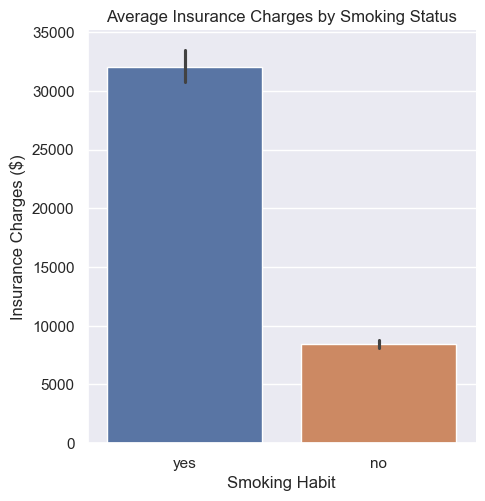

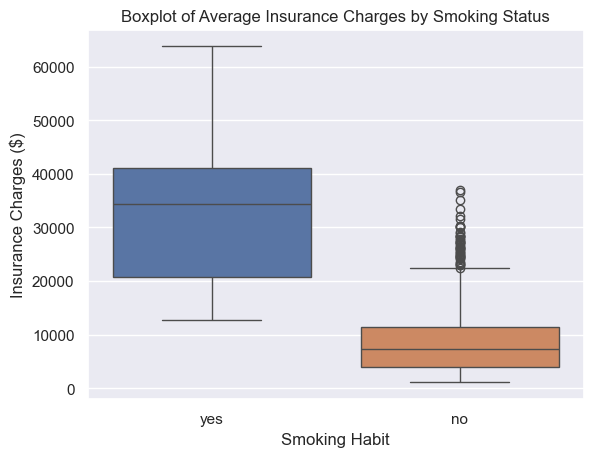

In [309]:
#Let's create a bar graph of the average insurance charges, broken up by smoking habit
sns.catplot(data=df, kind="bar", x="smoker", y="charges", hue="smoker")
plt.title("Average Insurance Charges by Smoking Status")
plt.xlabel("Smoking Habit")
plt.ylabel("Insurance Charges ($)")
plt.show()

#Same, but with a boxplot
sns.boxplot(data=df, x="smoker", y="charges", hue="smoker")
plt.title("Boxplot of Average Insurance Charges by Smoking Status")
plt.xlabel("Smoking Habit")
plt.ylabel("Insurance Charges ($)")
plt.show()

Okay, we have some basic visualization of our first hypothesis: that smoking affect insurance charges. But is it statistically significant? We can rely on visualization alone. Let's use our scipy package to run a t-test between these two groups. Remember, this assumes that other variables have no effect (we'll test that later).

As a side note - look how many outliers (small circles) the non-smoking group has. This probably means that there are other factors that are contributing to high cost of insurance. We will investigate later.

In [310]:

#Creating two separate DataFrames
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

#Run the t-test with 4 decimal places showing
t_stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")

T-statistic: 32.7519, P-value: 5.8895e-103


Wow, okay, so let's interpret those results.

A T-Statistic of 32.75 means that there is a strong (or large) effect of smoking on insurance charges relative to variability.
A P-Value of 5.8e-103 (meaning there are 102 zero's after the decimal point before we reach the 5) is incredibly small. The probability of the difference just being a fluke is that vanishingly small number.

These two numbers tell us that the effect of smoking on insurance charges are 1) LARGE and 2) very real.

Let's investigate smoking a little more (because it has such an outsized effect on insurance charges).

So let's ask a couple questions:

1) Do males smoke more than females?
2) How does age relate to smoking?
3) Do different regions have more smokers than others?


## EDA of Smoking Demographics

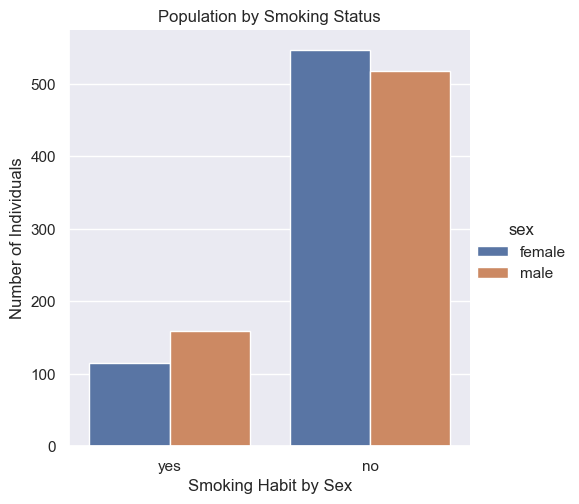

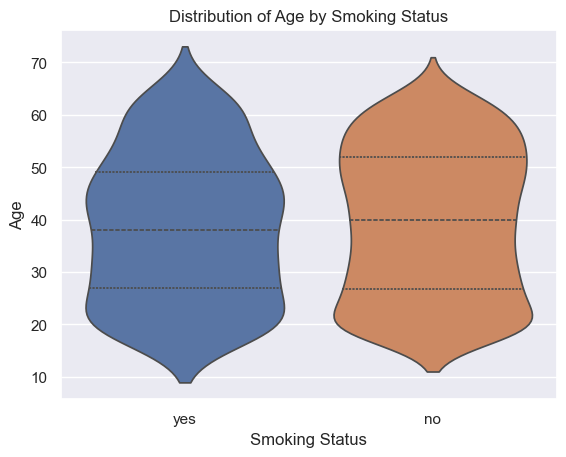

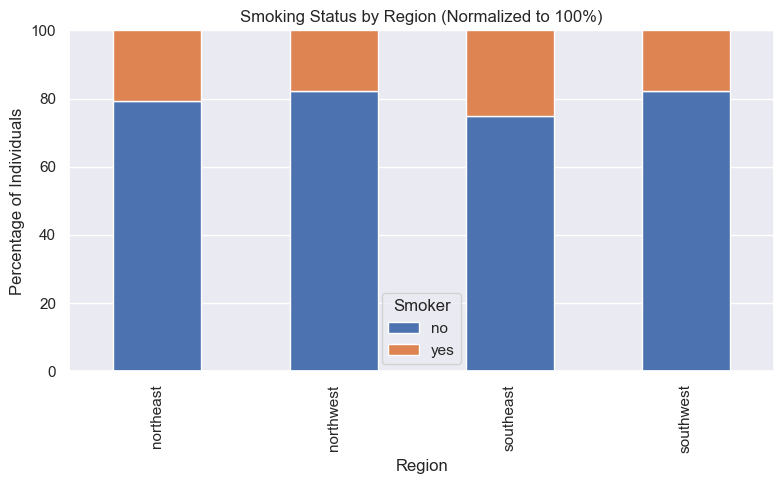

In [311]:
#Visualizing smoking demographics by sex
sns.catplot(data=df, kind="count", x="smoker", hue="sex")
plt.title("Population by Smoking Status")
plt.xlabel("Smoking Habit by Sex")
plt.ylabel("Number of Individuals")
plt.show()

#Visualizing smoking demographics by age
sns.violinplot(data=df, x='smoker', y='age', inner='quartile', hue='smoker')
plt.title("Distribution of Age by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.show()

# Count smoker/non-smoker per region
smoke_region = df.groupby(['region', 'smoker']).size().unstack(fill_value=0)

# Normalize to percentage (row-wise)
smoke_region_percent = smoke_region.div(smoke_region.sum(axis=1), axis=0) * 100

#Visualize our the smoker demographic by region
ax = smoke_region_percent.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))
plt.title("Smoking Status by Region (Normalized to 100%)")
plt.ylabel("Percentage of Individuals")
plt.xlabel("Region")
plt.legend(title="Smoker")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Our populations are pretty evenly matched (even tho n for smokers is much lower). We can see that in our Violin Plot visualizing age and smoking habit that the older generation has a higher proportion of smokers than younger, and that our Southeast has the highest percentage of smokers.


Now let's do the same thing with our other binary characteristic - sex!

## Sex and Insurance Charges

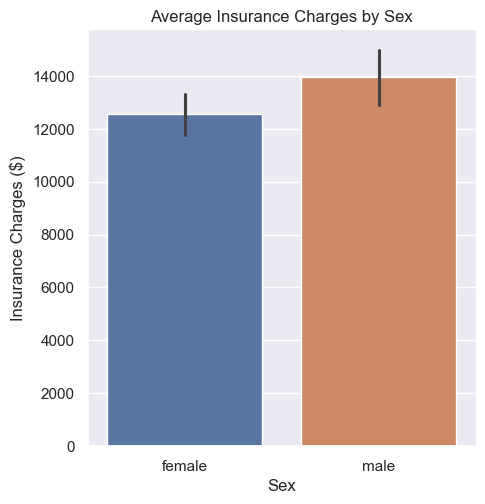

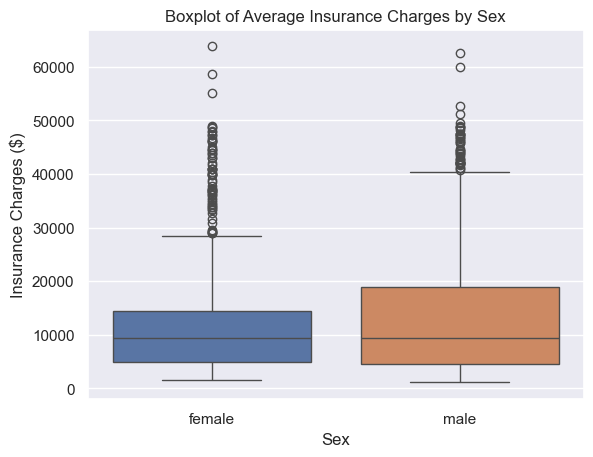

T-statistic: 2.1009, P-value: 3.5841e-02


In [312]:
#Let's create a bar graph of the average insurance charges, broken up by smoking habit
sns.catplot(data=df, kind="bar", x="sex", y="charges", hue="sex")
plt.title("Average Insurance Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Insurance Charges ($)")
plt.show()

#Creating two separate DataFrames
male_charges = df[df["sex"] == "male"]["charges"]
female_charges = df[df["sex"] == "female"]["charges"]

#Run the t-test
t_stat, p_value = stats.ttest_ind(male_charges, female_charges, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")

Right of the bat we can see this has a much less strong effect than smoking. The T-Statistic is only 2.1, and our P-Value is 0.0358, a number that we would generally classify as statistically significant. but not by much.

What have we learned so far? Smoking and sex both have statistically significant impacts on insurance charges.

What if we /combined/ these factors? Would a male smoker be charged even more than a female non-smoker? Would a female smoker be charged more than a male non-smoker?

Let's find out!

To begin, we're going to have to import statsmodels (since scipy only has a one-way ANOVA test, and we want to test the interaction between two variables).

### Two-way ANOVA for examining the relationship between Insurance Charges, Sex, and Smoking

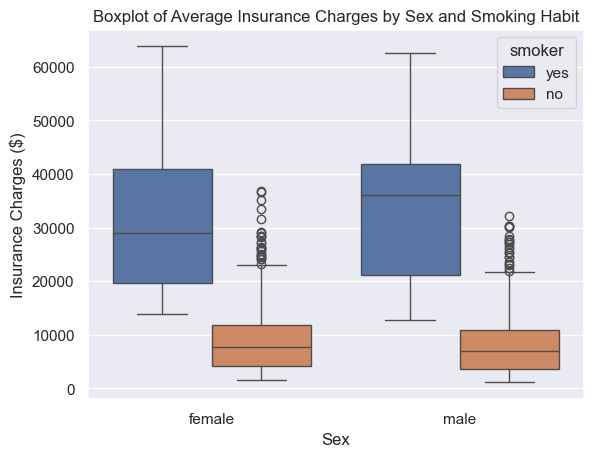

                      df        sum_sq       mean_sq            F  \
C(sex)               1.0  6.435902e+08  6.435902e+08    11.592531   
C(smoker)            1.0  1.208777e+11  1.208777e+11  2177.284440   
C(sex):C(smoker)     1.0  4.923397e+08  4.923397e+08     8.868165   
Residual          1334.0  7.406056e+10  5.551766e+07          NaN   

                         PR(>F)  
C(sex)             6.818323e-04  
C(smoker)         1.247285e-282  
C(sex):C(smoker)   2.954255e-03  
Residual                    NaN  


In [313]:
#visualize our different groups!
sns.boxplot(data=df, x="sex", y="charges", hue="smoker")
plt.title("Boxplot of Average Insurance Charges by Sex and Smoking Habit")
plt.xlabel("Sex")
plt.ylabel("Insurance Charges ($)")
plt.show()

#we can use df as our dataframe, and perform our two-way ANOVA
model = ols('charges ~ C(sex) + C(smoker) + C(sex):C(smoker)', data=df).fit()
result_sex_smoke = sm.stats.anova_lm(model, type=2)
print(result_sex_smoke)



So, what can we take away from this two-way ANOVA test?

Firstly, that being a smoker has a large AND statistically significant effect on insurance charges (if our p-value is the chance that our null hypothesis is true, our p-value is 1.2e-282! That's tiny!)

Secondly, sex also has large and statistically significant effect (although it is dwarfed by affect of smoking on insurance charges).

Thirdly, the interaction between sex and smoking is ALSO statistically significant! This suggests that being a smoker affects men and women differently in terms of how much the are charged for insurance!

But what about the Residual mean_sq? It's a large number (not as large as our characteristic and interaction mean_sq values, but still pretty big). This suggests that while a lot of variation is explained by our two characteristics in this ANOVA (smoking and sex), there remains other factors at play that are not being accounted for. This makes sense, as we haven't even touched Age, BMI, or Region yet! These will certainly affect insurance charges!

Let's move on to some more cases!

Age, BMI, Region, and Children are all characteristics that have more than one option. Region has four, while we have integers for ages and children, and float values for BMI. 

For BMI we can actually use the standard found in doctors offices around the world (we recognize that BMI is a flawed system and that these measurements do not tell the whole story):

BMI: <18: Underweight, 18-24: Healthy, 25-29: Overweight, 30-39: Obese, >39: Severly_Obese.

We can either decide to use these bins or to create a linear regression model measuring BMI more fluidly.

For age, we can use linear regression to create a model for how insurance charges change as we age.

Now that we have a plan, let's start by analyzing our regions.

## Relationship of Region and Insurance Charges

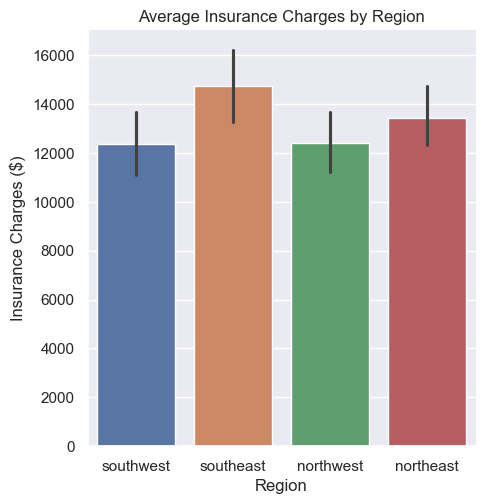

F_onewayResult(statistic=2.96962669358912, pvalue=0.030893356070506986)

In [314]:
#Let's create a bar graph of the average insurance charges, broken up by region
sns.catplot(data=df, kind="bar", x="region", y="charges", hue="region")
plt.title("Average Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Insurance Charges ($)")
plt.show()

#and now we can run a one-way ANOVA to see if our regions effect the charges of insurance in a statistically significant way!
stats.f_oneway(df['charges'][df['region'] == 'southwest'],
               df['charges'][df['region'] == 'southeast'],
               df['charges'][df['region'] == 'northwest'],
               df['charges'][df['region'] == 'northeast'])

Okay! it looks like there is something statistically significant here. However, we need a different test in order to tell what exactly is going on. We can use a post-hoc test like the Tukey-Kramer method (because our data is real-world, we can assume the sample sizes or n is not the same per region).

### Post-Hoc analysis of our one-way ANOVA results

In [315]:
#creating our regional df's
southwest = df[df["region"] == "southwest"]["charges"]
southeast = df[df["region"] == "southeast"]["charges"]
northwest = df[df["region"] == "northwest"]["charges"]
northeast = df[df["region"] == "northeast"]["charges"]

#running Tukey-Kramer post-hoc test (stats.tukey_hsd automatically uses Tukey-Kramer if data sets are not equal populations)
#0 = southwest, 1 = southeast, 2 = northwest, 3 = northeast
res = stats.tukey_hsd(southwest, southeast, northwest, northeast)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)  -2388.474     0.048 -4760.510   -16.439
 (0 - 2)    -70.638     1.000 -2508.883  2367.607
 (0 - 3)  -1059.447     0.679 -3499.572  1380.678
 (1 - 0)   2388.474     0.048    16.439  4760.510
 (1 - 2)   2317.836     0.058   -54.199  4689.872
 (1 - 3)   1329.027     0.475 -1044.942  3702.996
 (2 - 0)     70.638     1.000 -2367.607  2508.883
 (2 - 1)  -2317.836     0.058 -4689.872    54.199
 (2 - 3)   -988.809     0.725 -3428.934  1451.316
 (3 - 0)   1059.447     0.679 -1380.678  3499.572
 (3 - 1)  -1329.027     0.475 -3702.996  1044.942
 (3 - 2)    988.809     0.725 -1451.316  3428.934



Great! Now we are comparing the means of each region to every other region! 

We can conclude that there is a statistically significant difference in the means between southwest and southeast regions. Charges in the southeast are significantly higher than charges in the southwest!

The rest of our regions (when compared to each other) are NOT statistically different, although we can see there are *trends* in our data visualization.

Now we can see the importance of running post-hoc tests!

## Age and Insurance Charges - Linear Regression

Let's move on to our next variable: Age.

Let's first visualize how charges change with age.

**An important note**: I am separating smokers and non-smokers from each other in the next graph. I have decided to do this to reduce variability (since we know from our previous tests that smoking has an outsized effect on insurance charges). While sex (and to a degree, regions) affect insurance charges, smoking thus far has the greatest effect.

**The graph below shows stratified linear regression using the Ordinary Least Squares method, but the summary table uses multiple regression**

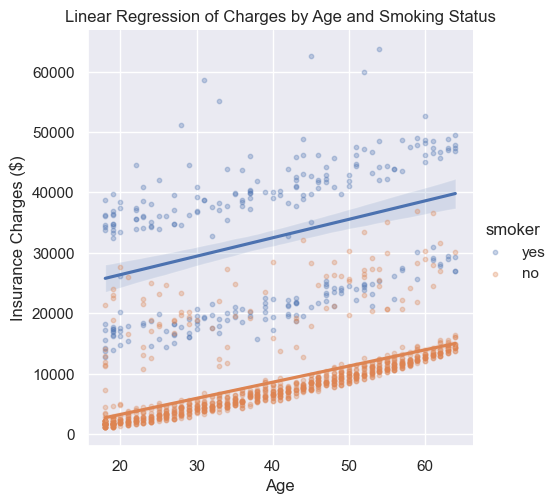

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1153.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:08:00   Log-Likelihood:                -13622.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1334   BIC:                         2.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2091.4206    582.56

In [316]:
#create a linear regression visualization
sns.lmplot(data=df, x="age", y="charges", hue="smoker", scatter_kws = {"s": 10, "alpha": 0.3})
plt.title("Linear Regression of Charges by Age and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Insurance Charges ($)")
plt.show()

#create a summary table using Ordinary Least Squares regression (ols)
model = ols('charges ~ age + smoker + age:smoker', data=df).fit()
print(model.summary())



That's quite a bit of information to digest. But we can focus on some important numbers off-hand:

Our R-squared value is 0.722, meaning about 72% of the variance in charges is explained by this model. That's a strong model, but not strong enough to use for prediction based interpretation. There are still too much variance unexplained by this model, however our Durbin-Watson cooeficient is close to 2, meaning there is little autocorrelation.

In plain english this means that our model is catching the variance that *can* be explained, and the residual does not correlate with itself (meaning that we can't infer an underlying causation our model is missing). That's good for this model!

Our probability (F-statistic) is approx. 0.00. This means the probability of our dataset happening by chance is effectively zero. 
Smokers at any given age pay about $22,390 more than their non-smoking corollaries (all things being equal). 
For every year a person ages, their insurance cost increases by about $267.25, and this effect is statistically significant. 
Smoking does not *significantly* affect the slope (insurance cost increasing per year), but it does affect the y-intercept (the starting point, or the $22,390 we mentioned earlier). 

For more on understanding for more information on how to interpret our summary table (including the diagnostic tests like Omnibus and Kurtosis) you can check out this article on geeksforgeeks.org, which helps summarize key components and explain them much better than I can here: https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/


Now that we have investigated age, let's continue with children (and how they affect insurance charges).



## Childrens effect on Insurance Charges

In [317]:
#finding the range of children in our df
print(f"Minimum recorded children: {df['children'].min()}, maximum recorded children: {df['children'].max()}")

Minimum recorded children: 0, maximum recorded children: 5


Now we have two choices - we can bin our records or use linear regression to see how each child affects insurance.

Let's start with binning our results and performing a one-way ANOVA.

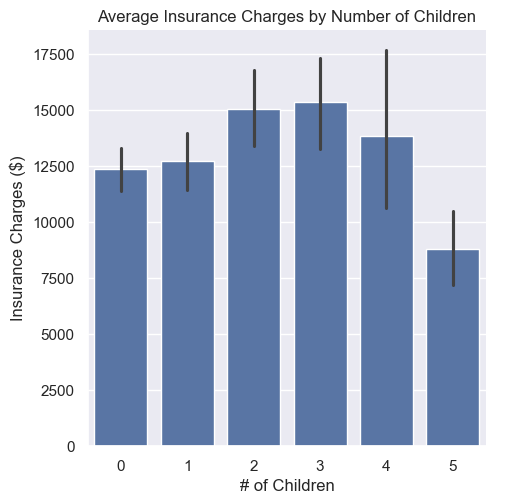

In [318]:
#Let's create a bar graph of the average insurance charges, broken up by num of children
sns.catplot(data=df, kind="bar", x="children", y="charges")
plt.title("Average Insurance Charges by Number of Children")
plt.xlabel("# of Children")
plt.ylabel("Insurance Charges ($)")
plt.show()

Interesting - we can see that there doesn't seem to be a linear correlation between the number of children one has and their insurance charges. Let's see if accounting for sex affects our readouts.

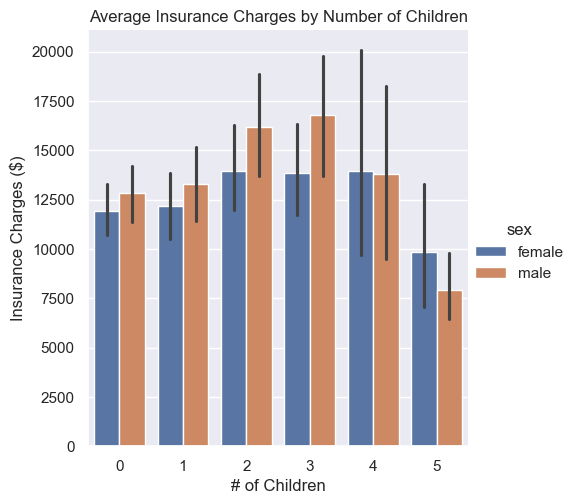

In [319]:
#Let's create a bar graph of the average insurance charges, broken up by num of children and sex
sns.catplot(data=df, kind="bar", x="children", y="charges", hue="sex")
plt.title("Average Insurance Charges by Number of Children")
plt.xlabel("# of Children")
plt.ylabel("Insurance Charges ($)")
plt.show()

Okay, just looking at these graphs, we can probably assume that there isn't much sway to the number of children and the affect it has on insurance charges. But let's run our statistical test just to make sure.

Let's first do a one-way ANOVA just on the number of children and insurance charges.

## Analysis of Children and Insurance Charges (ANOVA and Post-Hoc tests)

In [320]:
#one-way ANOVA for only num of children (not sex as well)
stats.f_oneway(df['charges'][df['children'] == 0],
               df['charges'][df['children'] == 1],
               df['charges'][df['children'] == 2],
               df['charges'][df['children'] == 3],
               df['charges'][df['children'] == 4],
               df['charges'][df['children'] == 5],
               )

F_onewayResult(statistic=3.296920166720223, pvalue=0.00578568138087328)

*Very interesting.* It looks like there is something *very close* to being statistically significant. Just out of curiousity let's do a post-hoc test to see where this difference could be!

In [321]:
#creating our df's by num of children
zero = df[df['children'] == 0]['charges']
one = df[df['children'] == 1]['charges']
two = df[df['children'] == 2]['charges']
three = df[df['children'] == 3]['charges']
four = df[df['children'] == 4]['charges']
five = df[df['children'] == 5]['charges']
#running Tukey-Kramer post-hoc test
res = stats.tukey_hsd(zero, one, two, three, four, five)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -365.196     0.998 -2756.477  2026.085
 (0 - 2)  -2707.588     0.041 -5352.867   -62.309
 (0 - 3)  -2989.343     0.066 -6088.716   110.030
 (0 - 4)  -1484.681     0.991 -8515.539  5546.178
 (0 - 5)   3579.940     0.817 -4657.448 11817.329
 (1 - 0)    365.196     0.998 -2026.085  2756.477
 (1 - 2)  -2342.392     0.203 -5273.166   588.382
 (1 - 3)  -2624.147     0.221 -5970.495   722.201
 (1 - 4)  -1119.484     0.998 -8262.656  6023.687
 (1 - 5)   3945.137     0.756 -4388.320 12278.593
 (2 - 0)   2707.588     0.041    62.309  5352.867
 (2 - 1)   2342.392     0.203  -588.382  5273.166
 (2 - 3)   -281.755     1.000 -3814.080  3250.571
 (2 - 4)   1222.907     0.997 -6009.256  8455.070
 (2 - 5)   6287.528     0.271 -2122.334 14697.391
 (3 - 0)   2989.343     0.066  -110.030  6088.716
 (3 - 1)   2624.147     0.221  -722.201  5970.495
 (3 - 2)    281.755     1.000 -3

Scrolling through these results, we can see that there is one comparison that is statistically significant - the insurance charges between groups that had zero recorded children, and those that had two recorded children. 

*"But looking at the earlier bar graph, people with 5 children pay much less in insurance than people with 2 children! Why isn't that significant?"*

That can be explained most succinctly by our group sizes. Let's explore:

In [322]:
#population of each group
print(df['children'].value_counts())

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


We know that variance is the sum of the squared difference from the mean divided by n-1 (where n is our sample size). 

This means that typically, the smaller our data set, the bigger the variance. We only have 18 people recorded as having five children (and only 25 people recorded as having four children). With such small n in each group, we are unable to say (statistically speaking) that there is a significant difference betwee these groups (4 and 5) and others.

Nevertheless, let's try viewing this data slightly differently: as a linear regression.

## Linear Regression Analysis of Childrens effect on Insurance Charges

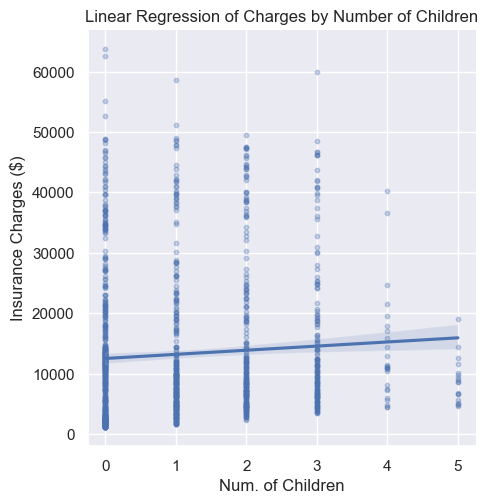

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.206
Date:                Wed, 02 Apr 2025   Prob (F-statistic):             0.0129
Time:                        10:08:01   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.252e+04    446.450     28.049      0.0

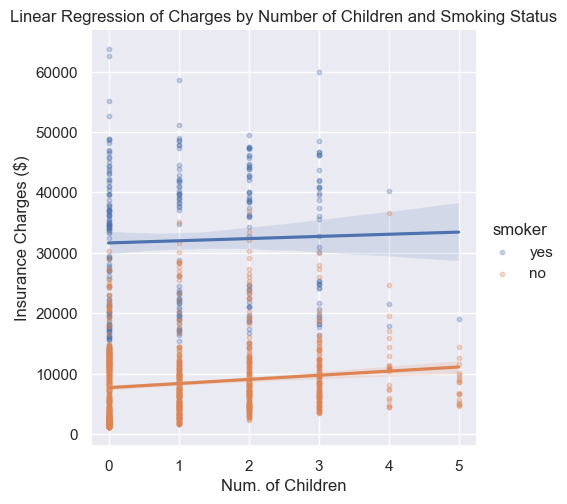

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          5.54e-284
Time:                        10:08:02   Log-Likelihood:                -13824.
No. Observations:                1338   AIC:                         2.765e+04
Df Residuals:                    1335   BIC:                         2.767e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7755.6647    292.878     26.481

In [323]:
#create a linear regression visualization
sns.lmplot(data=df, x="children", y="charges", scatter_kws = {"s": 10, "alpha": 0.3})
plt.title("Linear Regression of Charges by Number of Children")
plt.xlabel("Num. of Children")
plt.ylabel("Insurance Charges ($)")
plt.show()

#create a summary table using Ordinary Least Squares regression (ols)
model = ols('charges ~ children', data=df).fit()
print(model.summary())

#create a linear regression visualization that takes into account smoking status
sns.lmplot(data=df, x="children", y="charges", hue="smoker", scatter_kws = {"s": 10, "alpha": 0.3})
plt.title("Linear Regression of Charges by Number of Children and Smoking Status")
plt.xlabel("Num. of Children")
plt.ylabel("Insurance Charges ($)")
plt.show()

#create a summary table using Ordinary Least Squares regression (ols)
model = ols('charges ~ children + smoker', data=df).fit()
print(model.summary())

Comparing our analysis of Age and Smoking on Insurance Charges, we can starkly see the differences.

The R-squared value is just 0.005. That means that *0.5%* of our variance is explained through this model.

That means most of the variance must be influenced by something else (probably smoking, age, and our yet un-tested BMI markers). 

If we separate our data into the number of children *and* smoking status (the second graph and second table) we can see that our R-squared jumps up to 0.623, which is a massive increase in the amount of variance this model describes (but not as much as smoking status + age).

In addition - linear regression doesn't make sense for this data set practically (children are discrete, you can't really have 3.2 children, this is visualized by the bands of data along the x axis).

So let's move on to our final variable to explore - BMI.

## Analysis of BMI and Insurance Charges

First, let's start with an visualization (using linear regression) to analyse BMI and insurance charges.

To do that, let's create groups (or bins) for our BMI values (which are used by doctors to standardize BMI).

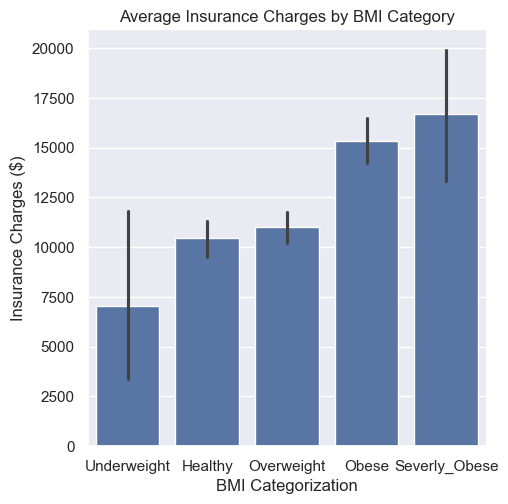

F_onewayResult(statistic=14.14399677615097, pvalue=2.6152163370765288e-11)

In [336]:
#Creating bins for BMI
df['bmi_bins'] = pd.cut(x=df['bmi'], 
                         bins=[0, 17.9, 24.9, 29.9, 39.9, 100], 
                         labels = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severly_Obese'])

sns.catplot(data=df, kind="bar", x="bmi_bins", y="charges")
plt.title("Average Insurance Charges by BMI Category")
plt.xlabel("BMI Categorization")
plt.ylabel("Insurance Charges ($)")
plt.show()

#one-way ANOVA for BMI groups
stats.f_oneway(df['charges'][df['bmi_bins'] == 'Underweight'],
               df['charges'][df['bmi_bins'] == 'Healthy'],
               df['charges'][df['bmi_bins'] == 'Overweight'],
               df['charges'][df['bmi_bins'] == 'Obese'],
               df['charges'][df['bmi_bins'] == 'Severly_Obese'],
               )

There is something here! Our p-value of 2.61e-11 let's us know we have something statistically significant. But there is a lot of noise, so let's see if we can visualize it another way.

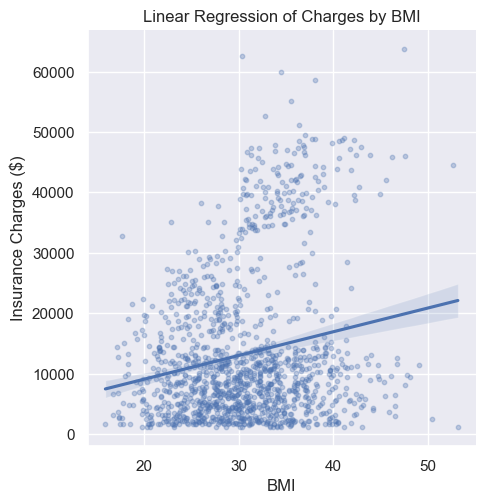

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           2.46e-13
Time:                        10:08:02   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.4

In [324]:
#vizualizing our data set using linear regression
#create a linear regression visualization
sns.lmplot(data=df, x="bmi", y="charges", scatter_kws = {"s": 10, "alpha": 0.3})
plt.title("Linear Regression of Charges by BMI")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges ($)")
plt.show()

#create a summary table using Ordinary Least Squares regression (ols)
model = ols('charges ~ bmi', data=df).fit()
print(model.summary())

Like with number of children, our R-squared value is week, but our Prob (F-statistic) is tiny - meaning that there may be an effect that is bigger than we would expect with just noise.

For every 1 unit increase in BMI, it looks like insurance costs raise by $393.87. This measurement is statistically significant!

So what we can take from this analysis is that BMI *does* have an effect, but other factors certainly have influence in the insurance charges. 

Given what we know so far, we can hypothesize that smoking status is having an effect. Let's test it.

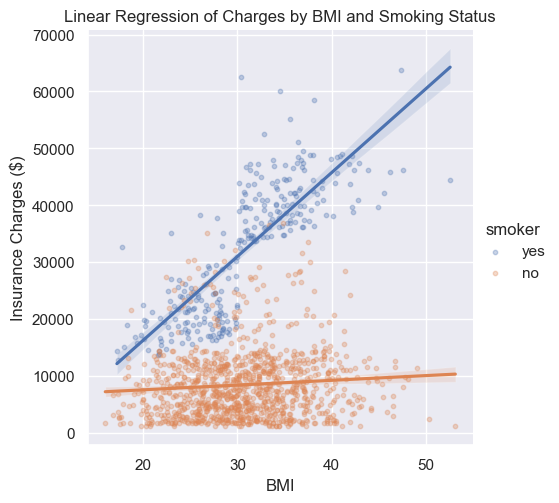

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1284.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.03e-311
Time:                        10:08:02   Log-Likelihood:                -13760.
No. Observations:                1338   AIC:                         2.753e+04
Df Residuals:                    1335   BIC:                         2.754e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3459.0955    998.279     -3.465

In [325]:
#vizualizing our smoking and bmi together
sns.lmplot(data=df, x="bmi", y="charges", scatter_kws = {"s": 10, "alpha": 0.3}, hue='smoker')
plt.title("Linear Regression of Charges by BMI and Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges ($)")
plt.show()

#create a summary table using Ordinary Least Squares regression (ols)
model = ols('charges ~ bmi + smoker', data=df).fit()
print(model.summary())

There it is: Smoking is a big contributing factor in how BMI affects insurance charges. 

Our R-squared value shot up to 0.658, and our P(F-Statistic) is miniscule. This model is pretty good, but I think we can do better. Let's put everything we've learned together.

## Final Regression Model

So... Back to our initial question. What affects insurance charges?

We can see by our analysis of all the variables that there are significant differences in insurance charges between a lot of our groups. Some, like smoking, have extremely noticeable and measurable effects. But how do they interact?

That question can be answered using a multiple linear regression model. This is the final piece of the puzzle, and will hopefully give us some insight into how all of these variables interact with each other.

In [327]:
#Full multiple linear regression model
model = ols('charges ~ age + C(sex) + bmi + children + C(region) + C(smoker)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:08:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

Our model that takes **everything** into account is technically pretty good! It has an adjusted R-squared of 0.749, a large f-statistic and significant p(f-statistic).

But given all our knowledge about this data set so far - let's ask again, *what are the important factors at play here?*

We know that smoking has an incredible effect on insurance charges. We also know age and BMI and sex affect our insurance charges as well. Regions and children have less of an effect on insurance charges.

So what would a linear regression model look like with just age, smoking and BMI?

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:08:22   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.168e+04    937.569  

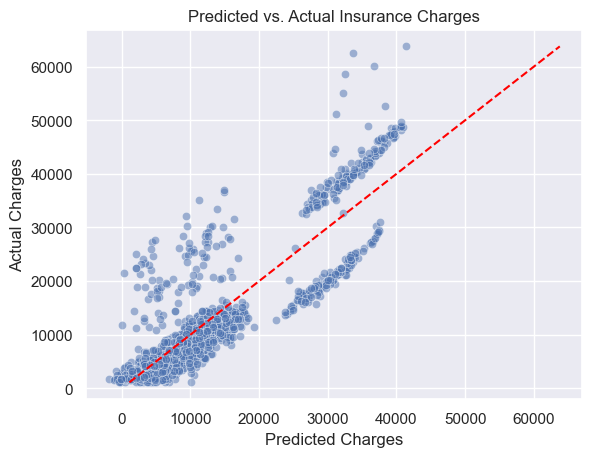

In [339]:
#Reduced multiple linear regression model
model = ols('charges ~ age + bmi + C(smoker)', data=df).fit()
print(model.summary())

#Visualizing Predicted vs. Actual
df["predicted_charges"] = model.predict(df)

sns.scatterplot(data=df, x="predicted_charges", y="charges", alpha=0.5)
plt.plot([df["charges"].min(), df["charges"].max()],
         [df["charges"].min(), df["charges"].max()], 
         color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")
plt.title("Predicted vs. Actual Insurance Charges")
plt.show()

This model explains 74.7% of the variance of our dataset, while only using three variables (compared to the full multiple regressions adjusted R-squared of 74.9%). The F-statistic actually *increased* compared to our full multiple regression model.

Our Durbin-Watson score is also closer to 2 (2.077 reduced vs 2.088 full), and across the board we have better results using fewer variables. 

The visualization shows what the predicted insurance charge (red dashed line) would be (given the inputs of BMI, Smoking Habit, and Age) vs the actual insurance charge (blue dots). 

Given that there are certainly factors that are not accounted for in our dataset (family history, underlying medical conditions, smoking frequency, etc.) it is not surprising to see some variance (especially at higher estimated insurance costs). 

## Conclusion

Let's go back to the very beginning. The question we asked was *"What affects insurance charges?"* 

Given our careful analysis of all the variables provided by our dataset, we can safely say that the variables that mostly affect our insurance charges are:

1. Smoking Habit
2. Age
3. BMI

These three variables alone can account for almost 75% of the variance that is found in our dataset. Using our statistical knowledge and modeling capabilities, we were able to describe a model that can help us predict insurance charges.

### Future Analysis

Interestingly, in our predictive model, there is a split right around $20,000. The data seems to continue trending upwards at about the same rate, but some have a lower y-intercept. This is an interesting shape, and could be the focus later on. Perhaps that is when variables such as Region or number of children come in to play. Future analysis can look into that region of interest and find out why it splits. 